### Import the packages

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import string
import cv2
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir("/home/ai-ml/Downloads/archive/fruits-360/"))
dim = 500

['readme.md', 'LICENSE', 'Training', 'Test', 'papers', 'test-multiple_fruits']


## Function to read the dataset

In [3]:
def getTomatoes(tomatoes, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Training', 'Test']
    if not k_fold:
        path = "/home/ai-ml/Downloads/archive/fruits-360/" + data_type + "/"
        for i,f in enumerate(tomatoes):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type, " images of " , tomatoes[i])
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "/home/ai-ml/Downloads/archive/fruits-360/" + v + "/"
            for i,f in enumerate(tomatoes):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllTomatoes():
    tomatoes = []
    for tomato_path in glob.glob("/home/ai-ml/Downloads/archive/fruits-360/Training/*"):
        tomato = tomato_path.split("/")[-1]
        tomatoes.append(tomato)
    return tomatoes

### Training data

#### Initialize the tomatoes on the training data

In [4]:
tomatoes=['Tomato Cherry Red','Tomato not Ripened']
print(tomatoes)
X_train, y_train =  getTomatoes(tomatoes, 'Training', print_n=True, k_fold=False)
X_test, y_test = getTomatoes(tomatoes, 'Test', print_n=True, k_fold=False)

['Tomato Cherry Red', 'Tomato not Ripened']
There are  492   Training  images of  Tomato Cherry Red
There are  474   Training  images of  Tomato not Ripened
There are  164   Test  images of  Tomato Cherry Red
There are  158   Test  images of  Tomato not Ripened


#### Use K-fold on the training data

In [5]:
X,y = getTomatoes(tomatoes, '', print_n=True, k_fold=True)
print("X = ",X)
print("y = ",y)

X =  [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [25

#### Scaling the images using Standard Scaler on the training data

In [6]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform([i.flatten() for i in X_train])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])
print("X = ",X)

X =  [[ 0.43082174  0.2948887   0.59275979 ...  0.          0.
   0.        ]
 [ 0.43082174  0.2948887   0.59275979 ...  0.          0.
   0.        ]
 [-1.91712636  0.2948887  -0.92810596 ...  0.          0.
   0.        ]
 ...
 [ 0.43082174  0.2948887   0.59275979 ...  0.          0.
   0.        ]
 [ 0.43082174  0.2948887  -0.92810596 ...  0.          0.
   0.        ]
 [ 0.43082174  0.2948887   0.59275979 ...  0.          0.
   0.        ]]


In [7]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(20,20)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axes = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axes[i, j].axis('off')
            axes[i, j].imshow(images[n])
            n += 1   

### 1) Trained Cherry Red Tomatoes

Tomato Cherry Red


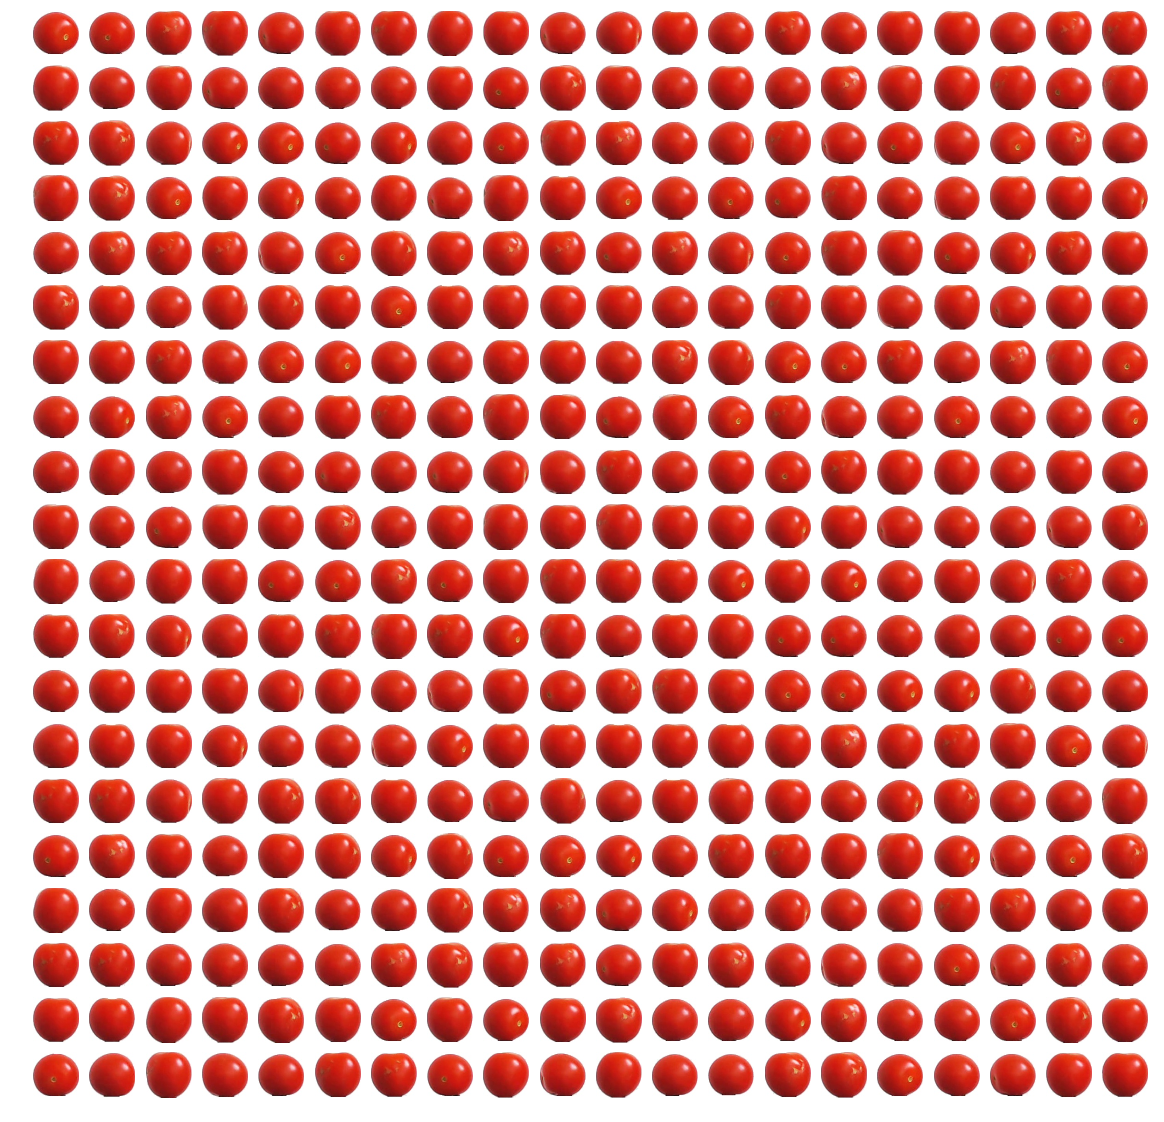

In [8]:
print(tomatoes[y_train[0]])
plot_image_grid(X_train[0:400], 20, 20)

### 2) Trained Not Ripened Tomatoes

Tomato not Ripened


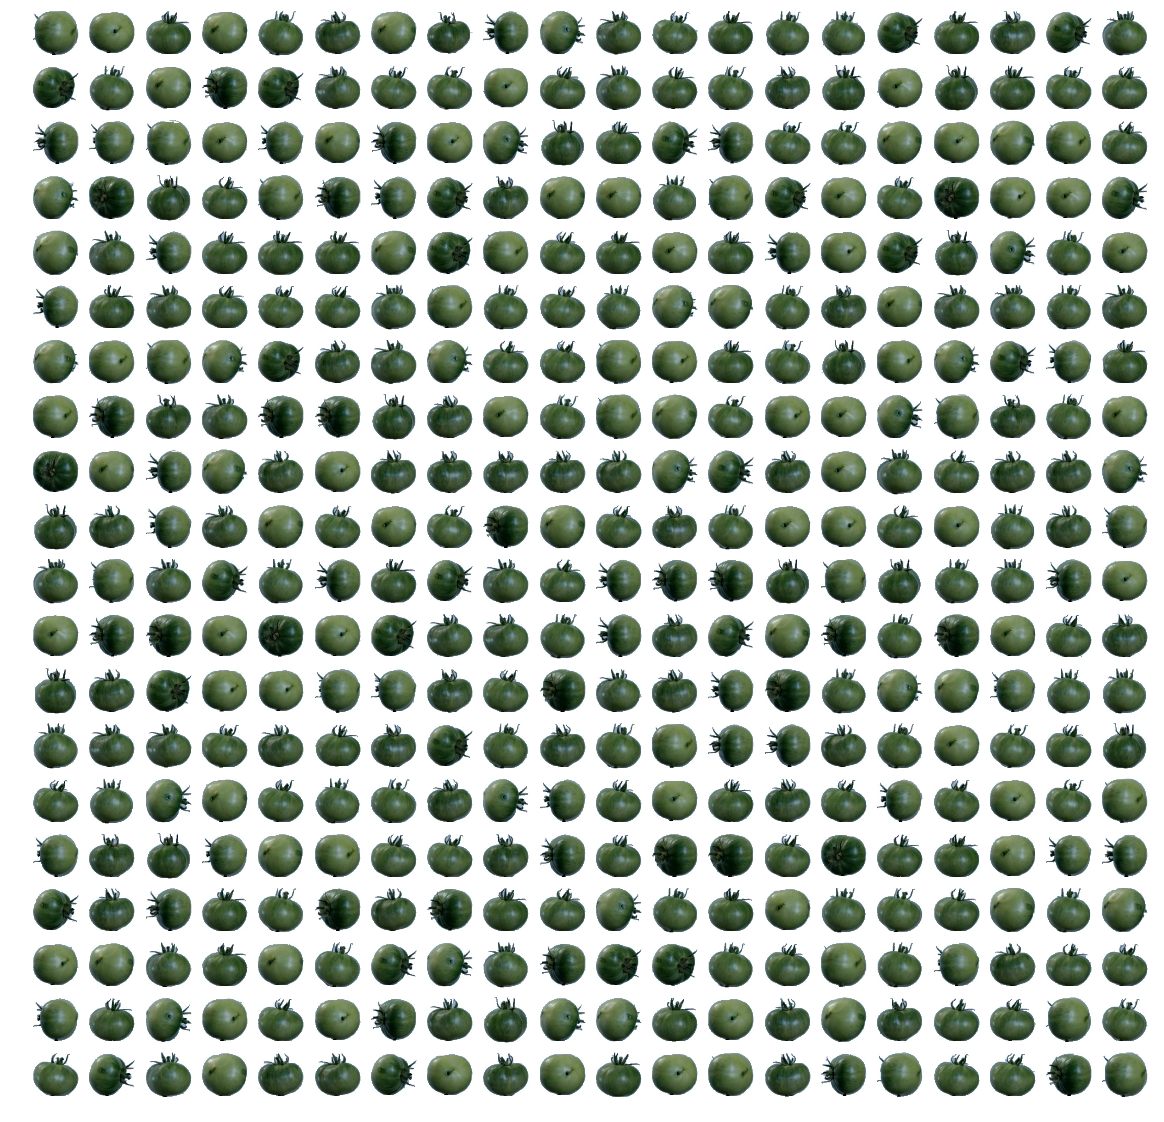

In [9]:
print(tomatoes[y_train[492]])
plot_image_grid(X_train[492:892], 20, 20)

### 1) Using Linear SVM for Classification on the training data

#### Define the model and evaluate all the metrics

In [10]:
tomatoes = ['Tomato Cherry Red','Tomato not Ripened']

#Get Images and Labels
X, y =  getTomatoes(tomatoes, 'Training')
X_test, y_test = getTomatoes(tomatoes, 'Test')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

In [11]:
# Linear SVM
model = SVC(C=1.0,degree=3,random_state=10,gamma='auto_deprecated',kernel='linear',probability=False)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Linear SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Linear SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Linear SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Linear SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Linear SVM = 100.0%
Precision with Linear SVM = 100.0%
Recall with Linear SVM = 100.0%
F1_score with Linear SVM = 100.0%


col_0    0    1
row_0          
0      164    0
1        0  158

## 2) Using Kernel RBF and Poly SVM on the training data

In [12]:
# Kernel RBF SVM
model = SVC(C=1.0,random_state=10,gamma='auto_deprecated', kernel='rbf',probability=False)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Kernel RBF SVM = 100.0%
Precision with Kernel RBF SVM = 100.0%
Recall with Kernel RBF SVM = 100.0%
F1_score with Kernel RBF SVM = 100.0%


col_0    0    1
row_0          
0      164    0
1        0  158

In [13]:
# Poly SVM
model = SVC(C=1.0,random_state=10,gamma='auto_deprecated', kernel='poly',probability=False)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Kernel RBF SVM = 100.0%
Precision with Kernel RBF SVM = 100.0%
Recall with Kernel RBF SVM = 100.0%
F1_score with Kernel RBF SVM = 100.0%


col_0    0    1
row_0          
0      164    0
1        0  158

## 3) Using PCA for SVM on the training data

In [16]:
pca = PCA(n_components=5,svd_solver='full',random_state=10)
# Convert the X_train data into 2D
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.fit_transform(X_test)

In [17]:
# Linear SVM
model = SVC(C=1.0,random_state=10, degree=3,gamma='auto_deprecated', kernel='linear',probability=False)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Linear SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Linear SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Linear SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Linear SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0]
Accuracy with Linear SVM after PCA = 11.2%
Precision with Linear SVM after PCA = 14.2%
Recall with Linear SVM after PCA = 11.2%
F1_score with Linear SVM after PCA = 12.5%


col_0    0    1
row_0          
0        0  122
1      164   36

In [18]:
# Kernel RBF SVM
model = SVC(C=1.0,random_state=10, degree=3,gamma='auto_deprecated',kernel='rbf',probability=False)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel RBF SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy with Kernel RBF SVM after PCA = 50.9%
Precision with Kernel RBF SVM after PCA = 100.0%
Recall with Kernel RBF SVM after PCA = 50.9%
F1_score with Kernel RBF SVM after PCA = 67.5%


col_0    0    1
row_0          
0      164  158

In [19]:
# Poly SVM
model = SVC(C=1.0,random_state=10, degree=3,gamma='auto_deprecated', kernel='poly',probability=False)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel RBF SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0]
Accuracy with Kernel RBF SVM after PCA = 13.4%
Precision with Kernel RBF SVM after PCA = 17.5%
Recall with Kernel RBF SVM after PCA = 13.4%
F1_score with Kernel RBF SVM after PCA = 15.1%


col_0    0    1
row_0          
0        0  115
1      164   43

### Testing data

In [20]:
def getTomatoes(tomatoes, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Test']
    if not k_fold:
        path = "/home/ai-ml/Downloads/archive/fruits-360/" + data_type + "/"
        for i,f in enumerate(tomatoes):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), " images of " , tomatoes[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "/home/ai-ml/Downloads/archive/fruits-360/" + v + "/"
            for i,f in enumerate(tomatoes):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllTomatoes():
    tomatoes = []
    for tomato_path in glob.glob("/home/ai-ml/Downloads/archive/fruits-360/Test/*"):
        tomato = tomato_path.split("/")[-1]
        tomatoes.append(tomato)
    return tomatoes

#### Initialize the tomatoes on the testing data

In [21]:
tomatoes=['Tomato Cherry Red','Tomato not Ripened']
print(tomatoes)
X_train, y_train =  getTomatoes(tomatoes, 'Test', print_n=True, k_fold=False)
X_test, y_test = getTomatoes(tomatoes, 'Training', print_n=True, k_fold=False)

['Tomato Cherry Red', 'Tomato not Ripened']
There are  164   TEST  images of  TOMATO CHERRY RED
There are  158   TEST  images of  TOMATO NOT RIPENED
There are  492   TRAINING  images of  TOMATO CHERRY RED
There are  474   TRAINING  images of  TOMATO NOT RIPENED


#### Use k-fold on the testing data

In [22]:
X,y = getTomatoes(tomatoes, '', print_n=True, k_fold=True)
print("X = ",X)
print("y = ",y)

X =  [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [255 255 255]
   [255 255 255]
   [25

#### Using standard scalar on the testing data

In [23]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform([i.flatten() for i in X_train])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])
print("X = ",X)

X =  [[ 0.44565716  0.24256956  0.63727038 ...  0.          0.
   0.        ]
 [ 0.44565716 -2.45078901  0.63727038 ...  0.          0.
   0.        ]
 [-1.750796    0.24256956  0.63727038 ...  0.          0.
   0.        ]
 ...
 [ 0.44565716  0.24256956  0.63727038 ...  0.          0.
   0.        ]
 [ 0.44565716  0.24256956 -0.83370498 ...  0.          0.
   0.        ]
 [ 0.44565716  0.24256956  0.63727038 ...  0.          0.
   0.        ]]


### 1) Tested Cherry Red tomatoes

Tomato Cherry Red


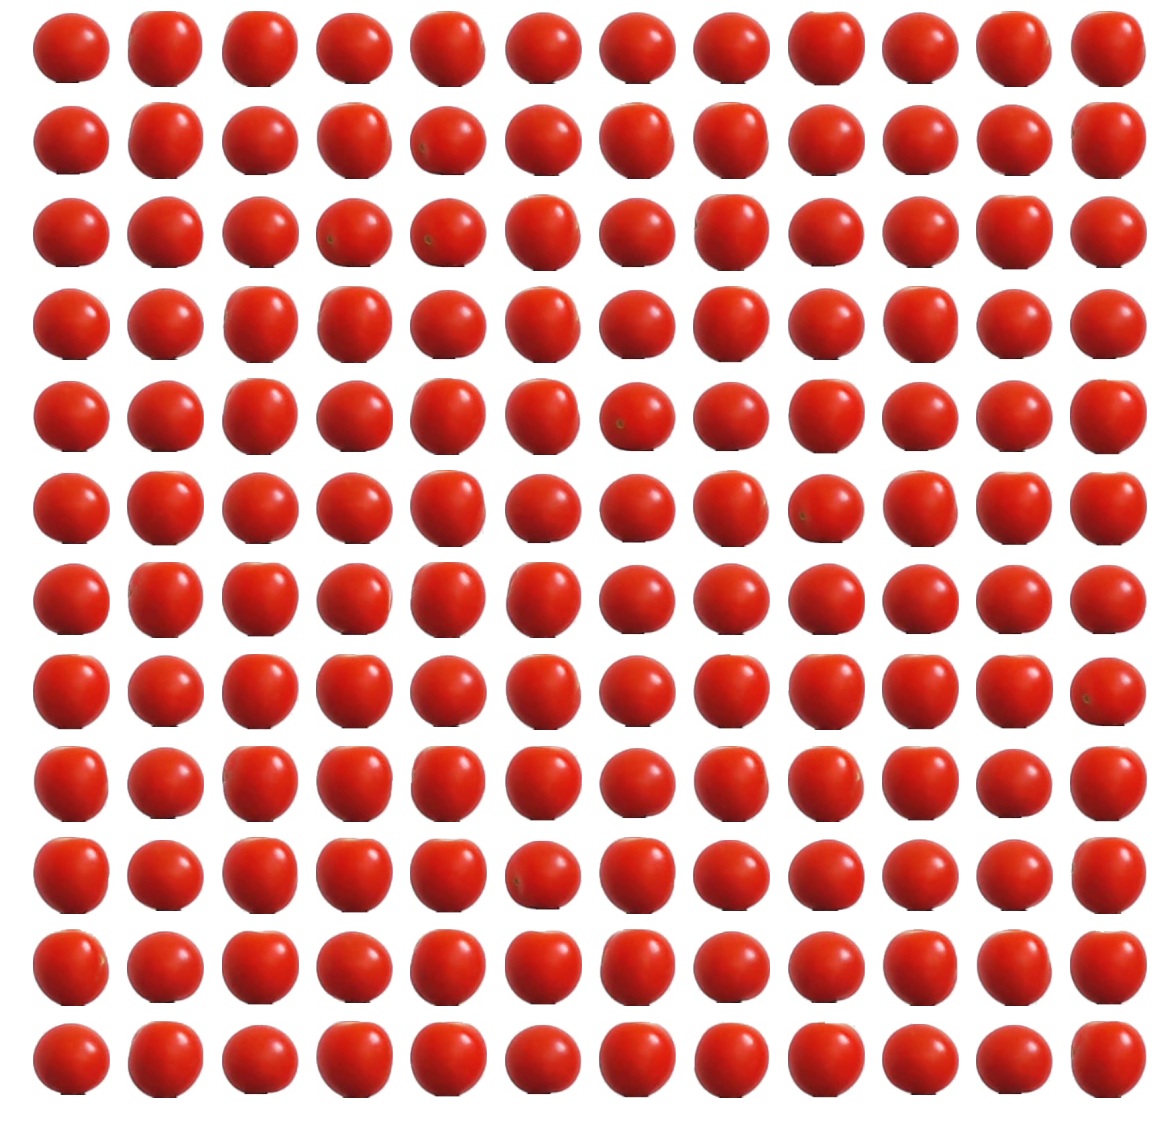

In [24]:
print(tomatoes[y_train[0]])
plot_image_grid(X_train[0:144], 12, 12)

### 2) Tested Not Ripened Green tomatoes 

Tomato not Ripened


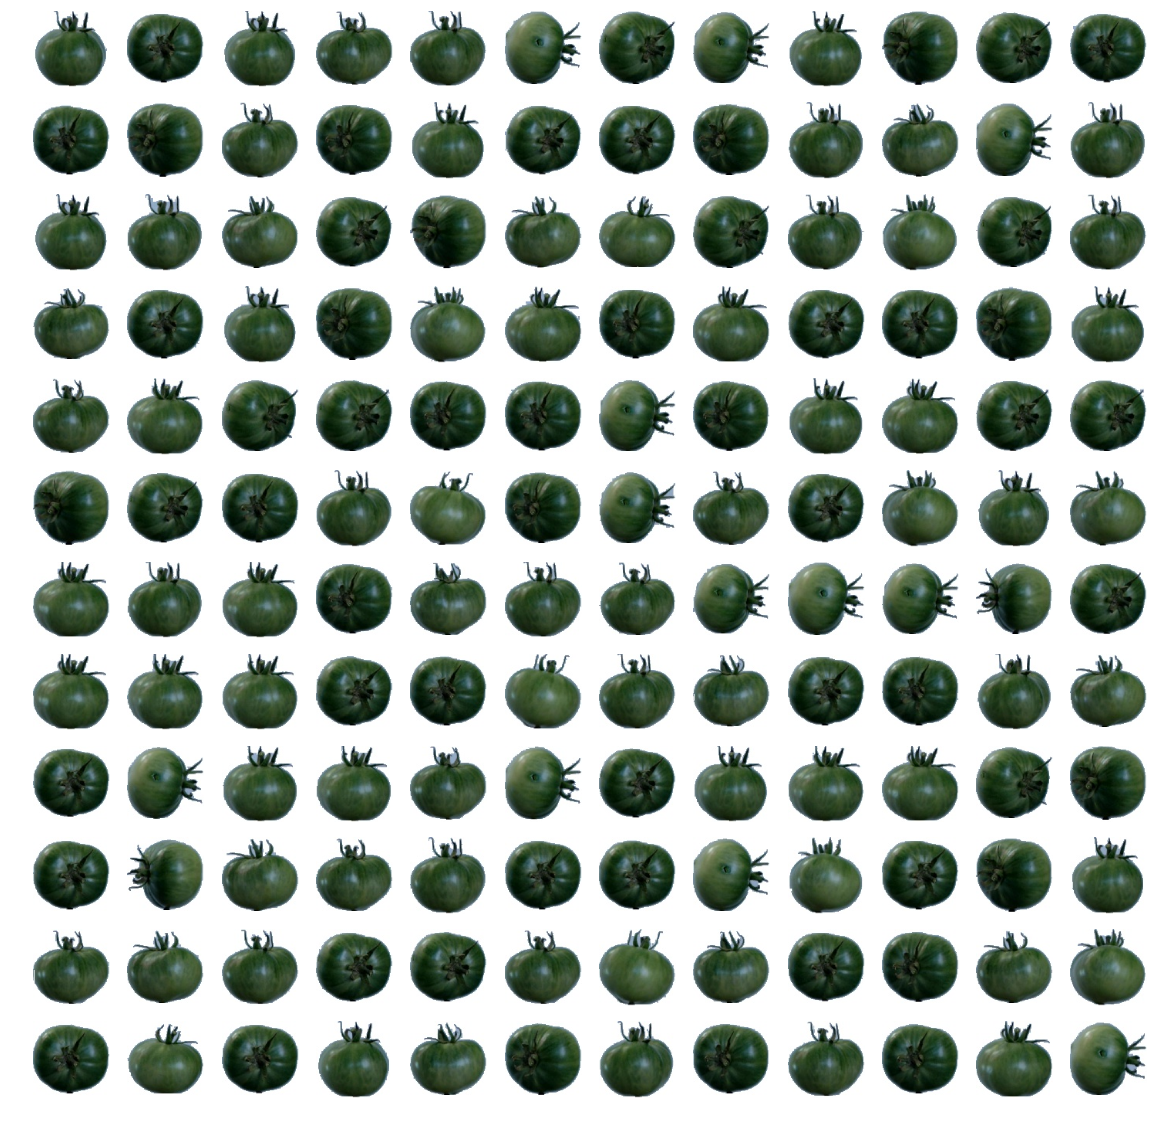

In [25]:
print(tomatoes[y_train[164]])
plot_image_grid(X_train[164:308], 12, 12)

### Classification on the testing data

In [26]:
tomatoes = ['Tomato Cherry Red','Tomato not Ripened']

#Get Images and Labels
X, y =  getTomatoes(tomatoes, 'Test')
X_test, y_test = getTomatoes(tomatoes, 'Training')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

## 1) Using SVM on the testing data

In [27]:
# Linear SVM
model = SVC(C=1.0,random_state=10,gamma='auto_deprecated', kernel='linear',probability=False)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Linear SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Linear SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Linear SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Linear SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

col_0    0    1
row_0          
0      492    0
1        0  474

In [28]:
# Kernel RBF SVM
model = SVC(C=1.0,degree=3,gamma='auto_deprecated',random_state=10, kernel='rbf',probability=False)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

col_0    0    1
row_0          
0      491    0
1        1  474

In [29]:
# Poly SVM
model = SVC(C=1.0,degree=3,gamma='auto_deprecated',random_state=10,kernel='poly',probability=False)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Poly SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Poly SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Poly SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Poly SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 

col_0    0    1
row_0          
0      492   20
1        0  454

## 2) Using PCA for SVM on the testing data

In [30]:
pca = PCA(n_components=5,svd_solver='full',random_state=10)
# Convert the X_train data into 2D
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.fit_transform(X_test)

In [31]:
# Linear SVM
model = SVC(C=1.0,degree=3,gamma='scale', kernel='linear',probability=False,random_state=10)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Linear SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Linear SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Linear SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Linear SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 

col_0    0    1
row_0          
0        0  454
1      492   20

In [32]:
# Kernel RBF SVM
model = SVC(C=1.0,degree=3,gamma='scale', kernel='rbf',probability=False,random_state=10)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel RBF SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 

col_0    0    1
row_0          
0        0  410
1      492   64

In [33]:
# Poly SVM
model = SVC(C=1.0,degree=3,gamma='auto_deprecated', kernel='poly',probability=False,random_state=10)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Poly SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Poly SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Poly SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Poly SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 

col_0    0    1
row_0          
0        1  459
1      491   15

## Verifying the model on the mobile captured Images

In [34]:
def getTomatoes(tomatoes, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Mobile_captured_training_tomatoes', 'Mobile_captured_test_tomatoes']
    if not k_fold:
        path = "/home/ai-ml/Downloads/" + data_type + "/"
        for i,f in enumerate(tomatoes):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type, " images of " , tomatoes[i])
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "/home/ai-ml/Downloads/" + v + "/"
            for i,f in enumerate(tomatoes):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllTomatoes():
    tomatoes = []
    for tomato_path in glob.glob("/home/ai-ml/Downloads/*"):
        tomato = tomato_path.split("/")[-1]
        tomatoes.append(tomato)
    return tomatoes

In [35]:
tomatoes=['Mobile_captured_green_tomatoes','Mobile_captured_red_tomatoes']
print(tomatoes)
X_train, y_train =  getTomatoes(tomatoes, 'Mobile_captured_training_tomatoes', print_n=True, k_fold=False)
X_test, y_test = getTomatoes(tomatoes, 'Mobile_captured_test_tomatoes', print_n=True, k_fold=False)

['Mobile_captured_green_tomatoes', 'Mobile_captured_red_tomatoes']
There are  500   Mobile_captured_training_tomatoes  images of  Mobile_captured_green_tomatoes
There are  500   Mobile_captured_training_tomatoes  images of  Mobile_captured_red_tomatoes
There are  100   Mobile_captured_test_tomatoes  images of  Mobile_captured_green_tomatoes
There are  100   Mobile_captured_test_tomatoes  images of  Mobile_captured_red_tomatoes


In [36]:
X,y = getTomatoes(tomatoes, '', print_n=True, k_fold=True)
print("X = ",X)
print("y = ",y)

X =  [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [25

In [37]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform([i.flatten() for i in X_train])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])
print("X = ",X)

X =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Mobile_captured_green_tomatoes


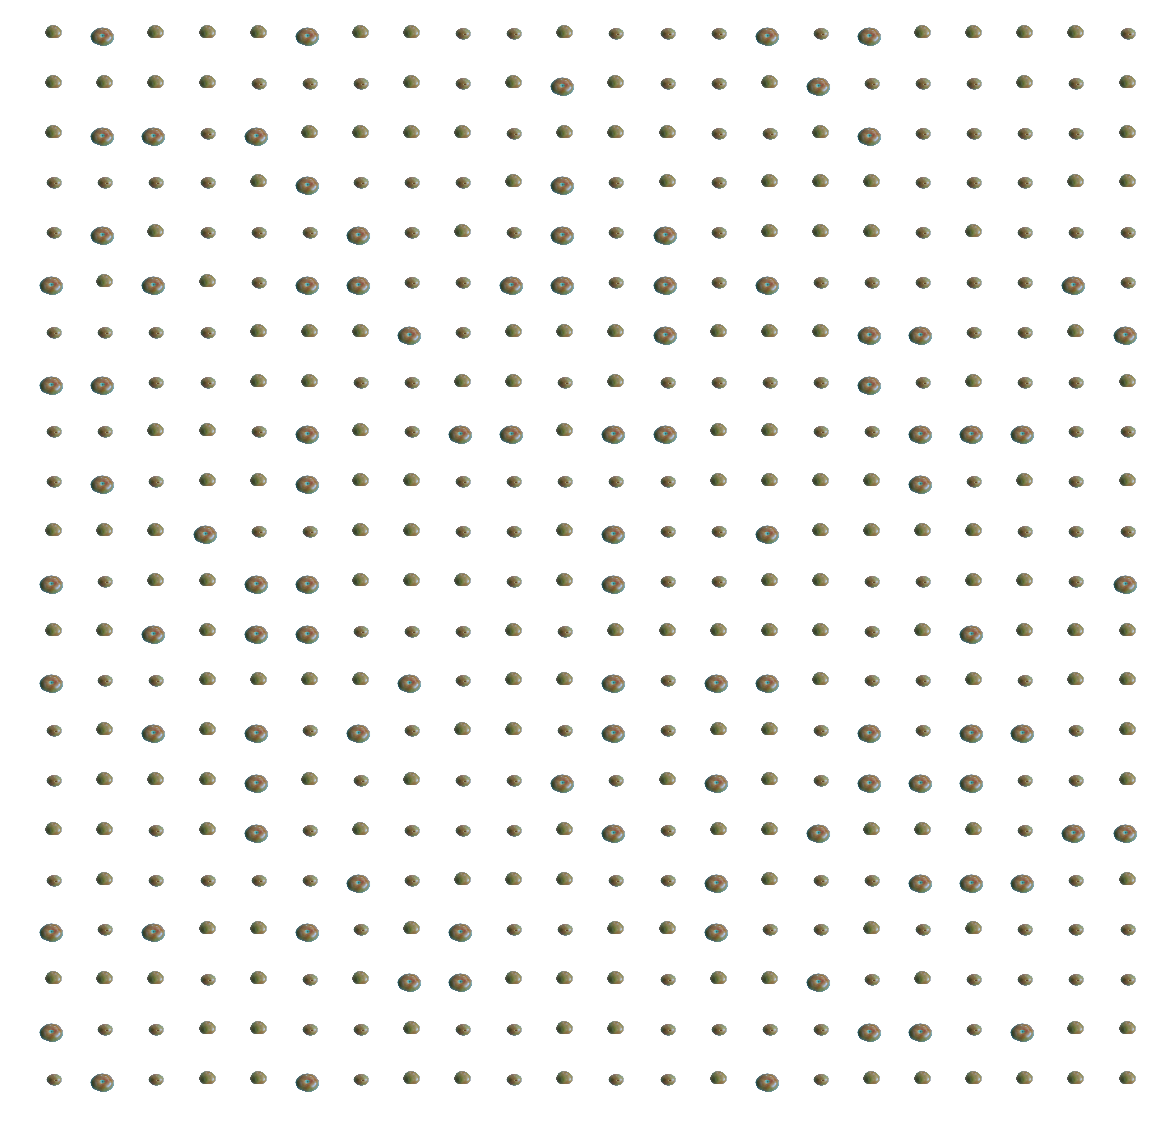

In [38]:
print(tomatoes[y_train[0]])
plot_image_grid(X_train[0:484], 22, 22)

Mobile_captured_red_tomatoes


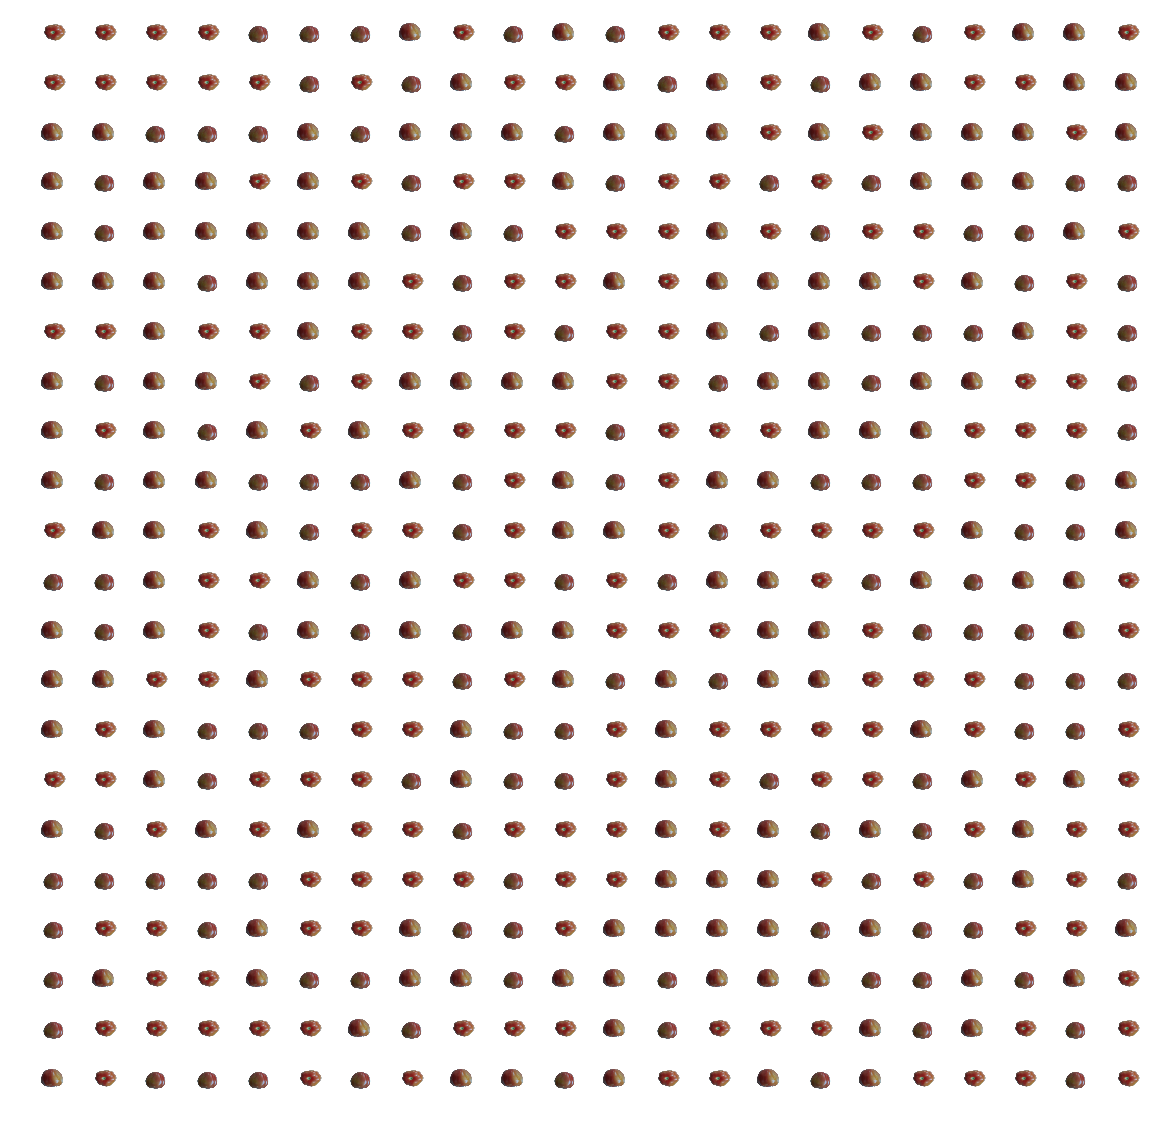

In [39]:
print(tomatoes[y_train[500]])
plot_image_grid(X_train[500:984], 22, 22)

In [40]:
tomatoes = ['Mobile_captured_green_tomatoes','Mobile_captured_red_tomatoes']

#Get Images and Labels
X, y =  getTomatoes(tomatoes, 'Mobile_captured_training_tomatoes')
X_test, y_test = getTomatoes(tomatoes, 'Mobile_captured_test_tomatoes')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

## 1) SVM for classification on mobile captured trained data of tomatoes

In [41]:
# Linear SVM
model = SVC(C=1.0,degree=3,random_state=10,gamma='auto_deprecated',kernel='linear',probability=False)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Linear SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Linear SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Linear SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Linear SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0]
Accuracy with Linear SVM = 52.5%
Precision with Linear SVM = 52.6%
Recall with Linear SVM = 52.5%
F1_score with Linear SVM = 52.5%


col_0   0   1
row_0        
0      55  50
1      45  50

In [42]:
# Kernel RBF SVM
model = SVC(C=1.0,degree=3,random_state=10,gamma='auto_deprecated',kernel='rbf',probability=False)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0]
Accuracy with Kernel RBF SVM = 52.5%
Precision with Kernel RBF SVM = 52.6%
Recall with Kernel RBF SVM = 52.5%
F1_score with Kernel RBF SVM = 52.5%


col_0   0   1
row_0        
0      55  50
1      45  50

In [43]:
# Poly SVM
model = SVC(C=1.0,degree=3,random_state=10,gamma='auto_deprecated',kernel='poly',probability=False)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Poly SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Poly SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Poly SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Poly SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0]
Accuracy with Poly SVM = 62.5%
Precision with Poly SVM = 90.6%
Recall with Poly SVM = 62.5%
F1_score with Poly SVM = 68.6%


col_0    0   1
row_0         
0      100  75
1        0  25

## 2) Using PCA on the mobile captured trained data of tomatoes

In [44]:
pca = PCA(n_components=5,svd_solver='full',random_state=10)
# Convert the X_train data into 2D
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.fit_transform(X_test)

In [45]:
# Linear SVM
model = SVC(C=1.0,degree=3,gamma='auto_deprecated',kernel='linear',probability=False,random_state=10)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Linear SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Linear SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Linear SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Linear SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0]
Accuracy with Linear SVM after PCA = 55.0%
Precision with Linear SVM after PCA = 55.0%
Recall with Linear SVM after PCA = 55.0%
F1_score with Linear SVM after PCA = 55.0%


col_0   0   1
row_0        
0      55  45
1      45  55

In [46]:
# Kernel RBF SVM
model = SVC(C=1.0,degree=3,random_state=10,gamma='scale',kernel='rbf',probability=False)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Kernel RBF SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0]
Accuracy with Kernel RBF SVM after PCA = 52.5%
Precision with Kernel RBF SVM after PCA = 52.6%
Recall with Kernel RBF SVM after PCA = 52.5%
F1_score with Kernel RBF SVM after PCA = 52.5%


col_0   0   1
row_0        
0      50  45
1      50  55

In [47]:
# Poly SVM
model = SVC(C=1.0,degree=3,random_state=10,gamma='scale',kernel='poly',probability=False)
model.fit(X_train_2D, y_train) 
y_predict_2D = model.predict(X_test_2D)
print("Y_Predict =",y_predict_2D)
accuracy = metrics.accuracy_score(y_predict_2D, y_test) * 100
print("Accuracy with Poly SVM after PCA = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict_2D, y_test,average='weighted') * 100
print("Precision with Poly SVM after PCA = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict_2D, y_test,average='weighted') * 100
print("Recall with Poly SVM after PCA = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict_2D, y_test,average='weighted') * 100
print("F1_score with Poly SVM after PCA = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict_2D,y_test)

Y_Predict = [1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0]
Accuracy with Poly SVM after PCA = 42.5%
Precision with Poly SVM after PCA = 45.6%
Recall with Poly SVM after PCA = 42.5%
F1_score with Poly SVM after PCA = 43.4%


col_0   0   1
row_0        
0      55  70
1      45  30